# Cleaning data: drop, replace, melt y otras cositas

En esta ayudantía haremos un repaso en metodos de limpieza de datos, para esto repasaremoslas funciones más comunes y luego iremos a la actividad con dos ejemplos prácticos de limpieza de datos

## Melt

Melt es una funcion que nos permite, de cierta forma, convertir columnas en filas, veamos un ejemplo:

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'}, 
                   'B': {0: 1, 1: 3, 2: 5},
                   'C': {0: 2, 1: 4, 2: 6}}) #creamos un dataframe cualquiera
df

,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


In [3]:
pd.melt(df, id_vars=['A'], value_vars=['B'])

,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5


podemos ver que, transformamos la columna `B` en una fila de variables, en este caso no es muy útil, al fin y al cabo todo lo que hicimos fue presentar la misma información gastando más especio, pero veamos el ejemplo siguiente:

In [4]:
pd.melt(df, id_vars=['A'], value_vars=['B', 'C'])

,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5
3,a,C,2
4,b,C,4
5,c,C,6


En este caso tiene más sentido, convertimos ambas columnas en datos. En resumen, `pd.melt` nos permite transformar `dataframes` "anchos" en `dataframes` "largos". Por ultimo, podemos escoger que nombres le daremos a las nuevas columnas, como vesmoa a continuacuón

In [5]:
pd.melt(df, id_vars=['A'], value_vars=['B', 'C'], var_name = 'myVarname', value_name='myValname') 

,A,myVarname,myValname
0,a,B,1
1,b,B,3
2,c,B,5
3,a,C,2
4,b,C,4
5,c,C,6


## Drop 

Esta es la función que usaremos para quitar filas o columnas, existen un par de sabores en como hacerlo, como veremosa a continuación

In [6]:
df = pd.DataFrame(np.arange(12).reshape(3, 4),
                  columns=['A', 'B', 'C', 'D'])
df


,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


La forma más común es la siguiente, usando `axis = 1`nos deja dropear columnas

In [7]:
df.drop(['B', 'C'], axis=1)

,A,D
0,0,3
1,4,7
2,8,11


Un método más intuitivo es el siguiente: 

In [8]:
df.drop(columns = ['B', 'C'])

,A,D
0,0,3
1,4,7
2,8,11


Esto nos deja especificar las columnas usando `columns = [...]`, funciona de las misma forma que el primero, pero es mucho más intuitivo

In [9]:
df.drop([0, 1])

,A,B,C,D
2,8,9,10,11


Por último discutiremos `inplace = True`, eso lo que nos permite es realizar la opreracion directamente en el dataframe, en vez de tener que hacer `df = df.drop()`. Suele ser el método más limpio. Notemos que esto no solo se puede hacer en `.drop()`, sino que en la gran mayoría de los metodos que se pueden hacer sobre los dataframes

In [10]:
df.drop([0, 1], inplace = True) #estas dos lineas hacen lo mismo

In [11]:
df = pd.DataFrame(np.arange(12).reshape(3, 4),
                  columns=['A', 'B', 'C', 'D'])

In [12]:
df = df.drop([0, 1]) #estas dos lineas hacen lo mismo

## Dropna

Esta también es una función común, que nos permite dropear las filas o columnas que contagan valores nulos. Una acotacion, los valores `pd.NaT` en el siguiente dataframe son "Not a Timestamap", y nos permite mantener los tipos de datos de la columna; `.dropna()` los trata de la misma forma que `np.nan`

In [13]:
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman'],
                   "toy": [np.nan, 'Batmobile', 'Bullwhip'],
                   "born": [pd.NaT, pd.Timestamp("1940-04-25"),
                            pd.NaT]})
df

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [14]:
df.dtypes

name            object
toy             object
born    datetime64[ns]
dtype: object

El comportamiento por defecto de `dropna()` es dropear todas las filas que tengan un valor nulo en cualquier valor 

In [15]:
df.dropna()

,name,toy,born
1,Batman,Batmobile,1940-04-25


Tambien podemos tener un funcionamiento similar, pero en vez de quitar filar, quita columnas.

In [16]:
df.dropna(axis='columns')

,name
0,Alfred
1,Batman
2,Catwoman


Tambien le podemos especificar que lo haga solo si todos los valores son nulos 


In [17]:
df.dropna(how='all')

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


Tambien podemos entregarle `thresh = ...` que lo que hará es solo dropear las filas que tengan una cantidad igual o mayor de valores nulos que lo que especifiquemos

In [18]:
df.dropna(thresh=2)

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


Por último, `subset = ...` nos permite hacer que revise solo las columnas que le especificamos

In [19]:
df.dropna(subset=['name', 'toy'])

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


De la misma forma, podems usar `inplace=True` para hacer ñas modificaciones directamente en el dataframe

In [20]:
df.dropna(inplace=True)
df.head()

,name,toy,born
1,Batman,Batmobile,1940-04-25


# Actividades
Para estas actividades los que haremos será limpiar dos bases de datos, una será limpiar dos bases de datos con el fin de dejarlas listas para uso

# 1.- Libros de la Bilioteca Británica

En esta primera actividad limpiaremos una base de datos de libros de la bilbioteca británica, cortesia de [realpython](https://github.com/realpython/python-data-cleaning), como siempre, lo primero que haremos será invocar al dataframe, y ver como está ordenado todo

In [21]:
df = pd.read_csv('./data/BL-Flickr-Images-Book.csv')
df.head()

,Identifier,Edition Statement,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Corporate Author,Corporate Contributors,Former owner,Engraver,Issuance type,Flickr URL,Shelfmarks
0,206,NaN,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,"FORBES, Walter.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12641.b.30.
1,216,NaN,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12626.cc.2.
2,218,NaN,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12625.dd.1.
3,472,NaN,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.","Appleyard, Ernest Silvanus.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 10369.bbb.15.
4,480,"A new edition, revised, etc.",London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.","BROOME, John Henry.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 9007.d.28.


Podemos ver que no es uno muy largo, pero de todas formas vamos a asumir que sabemos que las columnas `'Edition Statement','Corporate Author','Corporate Contributors','Former owner','Engraver','Contributors','Issuance type','Shelfmarks'` no las vamos a necesitar, por lo que procederemos a dropearlas

In [22]:
to_drop = [
           'Edition Statement','Corporate Author','Corporate Contributors','Former owner','Engraver','Contributors','Issuance type','Shelfmarks'
          ]

df.drop(to_drop
        , inplace = True
        , axis = 1
       )
df.head()

,Identifier,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
0,206,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
1,216,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
2,218,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
3,472,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
4,480,London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...


Ahora tenemos un *dataframe* de un tamaño mucho más manejable, además tenemos una columna llamada `Identifier`, esta puede que nos sea útil como indice, pero antes, utiliza el metodo `.is_unique` para revisar que el valor para cada fila sea único. 

In [23]:
df['Identifier'].is_unique

True

En pandas, no es necesario el valor del indice sea único, pero algunos métodos lo exigen, así que es bueno tenerlo en cuenta. Ahora, hagamos que la columna `Identifier` sea el indice

In [24]:
df.set_index('Identifier'
             , inplace = True
            )
df.head()

,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
Identifier,,,,,,
206,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
216,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
218,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
472,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
480,London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...


Ya que tenemos el dataset un poco más limpio, procederemos a revisar en que sitiacion nos encontramos con `NaNs`, para eso utiliza el metodo `.info()` para reviar cuantos valores no nulos hay por columna

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8287 entries, 206 to 4160339
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Place of Publication  8287 non-null   object
 1   Date of Publication   8106 non-null   object
 2   Publisher             4092 non-null   object
 3   Title                 8287 non-null   object
 4   Author                6509 non-null   object
 5   Flickr URL            8287 non-null   object
dtypes: object(6)
memory usage: 453.2+ KB


Podemos ver que tenemos una cantidad no menos de valores nulos en `Publisher` y en `Author`, asumiremos que no importa que haya valroes nulos en la primera, pero que si no contienen el autor no nos sirven para el analizis que nos interesa, para esto vamos a dropear todas las filas que tengan un valor nulo en la columna `Author`

In [26]:
df.dropna(subset = ['Author']
          , inplace = True
         )
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6509 entries, 206 to 4159587
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Place of Publication  6509 non-null   object
 1   Date of Publication   6380 non-null   object
 2   Publisher             3064 non-null   object
 3   Title                 6509 non-null   object
 4   Author                6509 non-null   object
 5   Flickr URL            6509 non-null   object
dtypes: object(6)
memory usage: 356.0+ KB


# 2.- GDP per Captita en América del Sur

Para esta parte usaremos los datos de creciemiento de GDP per cápita porcentuales de paises en Sudamerica obtenidos en [World Bank Open Data](https://data.worldbank.org/), el proceso de obntenerlos el algo complejo, pero al final nos deja con un csv que contiene estos datos para los 10 paises con mayor GDP en sudamerica. Ahora, lo de siempre, invocar los datos

In [27]:
df = pd.read_csv("./data/gdp_pc_growth_per_sa.csv")
df #no usamos .head() porque el largo de la serie es manejable

,Series Name,Series Code,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,Argentina,ARG,-1.874912,-5.447092,-11.854777,7.676546,7.884938,7.729475,...,4.788683,-2.145284,1.265685,-3.578581,1.62966427946265,-3.11006389821465,1.60928234377617,-3.46737624314432,-3.13005137908782,..
1,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,Bolivia,BOL,0.544926,-0.235707,0.579771,0.831349,2.298482,2.574813,...,3.510975,3.453698,5.127573,3.843757,3.28271871061374,2.73204225738901,2.69606298190566,2.75215380976242,0.796552665656364,..
2,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,Brazil,BRA,2.911826,0.013370,1.709474,-0.122936,4.497077,2.026307,...,3.026407,1.014510,2.108912,-0.352479,-4.35148398862317,-4.0694071643008,0.508336053889494,0.526155826049262,0.379344236418362,..
3,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,Chile,CHL,4.094287,2.146189,2.000618,3.005830,6.102839,4.646701,...,5.057788,4.309218,3.031526,0.692556,1.10594434535712,0.372104022166411,-0.243323996034391,2.51338504277558,-0.133968534486016,..
4,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,Colombia,COL,1.287368,0.096760,0.950716,2.393940,3.850793,3.423347,...,5.916430,2.979548,4.183393,3.449034,1.76114004205137,0.708331383936113,-0.153066085789078,0.971629907629179,1.90442504982143,..
5,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,Ecuador,ECU,-0.813530,2.134650,2.284687,0.984821,6.406680,3.543854,...,6.221052,4.070253,3.387280,2.198941,-1.50758512320009,-2.89802488713731,0.573877116510374,-0.483387784029688,-1.61236867338619,..
6,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,Peru,PER,1.213136,-0.656163,4.279640,3.132751,4.000779,5.362301,...,5.467384,5.267529,4.902572,1.305705,1.9633170881576,2.42290129520384,0.829119680820753,2.20561703131051,0.512493735175681,..
7,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,"Venezuela, RB",VEN,1.747114,1.489555,-10.503975,-9.384249,16.261957,8.498847,...,2.559313,3.920542,-0.089837,-4.731050,..,..,..,..,..,..
8,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,Paraguay,PRY,-4.274978,-2.756617,-1.892275,2.449874,2.285779,0.493016,...,2.834386,-1.894340,6.939283,3.442783,1.7054031286379,2.94123669886739,3.59484709836791,2.02947951100916,-1.28673598517732,..
9,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,Uruguay,URY,-2.276275,-4.010015,-7.747736,0.877226,5.073458,7.449554,...,4.860625,3.230534,4.314467,2.904978,0.030240602931201,1.32976957027928,2.2177686458628,1.24731253455232,-0.13788919732049,..


Podemos notar un par de problemas a primera vista, tenemos un par de columnas que no vamos a usar, muchos valores nulos, nombres raros en las columnas. Veamos primero que podemos hacer en las columnas

In [28]:
df.columns

Index(['Series Name', 'Series Code', 'Country Name', 'Country Code',
       '2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]', '2003 [YR2003]',
       '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]',
       '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]',
       '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]',
       '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]',
       '2020 [YR2020]'],
      dtype='object')

De buenas a primeras, las columnas `'Series Name', 'Series Code','Country Code', '2020 [YR2020]'` no las usaremos, las primeras tres porque son codigos, y la uiltima porque aun no tiene datos, asi que las podemos dropear

In [29]:
to_drop = [
            'Series Name', 'Series Code','Country Code', '2020 [YR2020]'
          ]
df.drop(columns = to_drop
        , inplace = True
       )
df.head()

,Country Name,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],...,2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
0,Argentina,-1.874912,-5.447092,-11.854777,7.676546,7.884938,7.729475,6.955547,7.924238,3.029477,...,9.300128,4.788683,-2.145284,1.265685,-3.578581,1.62966427946265,-3.11006389821465,1.60928234377617,-3.46737624314432,-3.13005137908782
1,Bolivia,0.544926,-0.235707,0.579771,0.831349,2.298482,2.574813,2.977342,2.781324,4.368537,...,2.429278,3.510975,3.453698,5.127573,3.843757,3.28271871061374,2.73204225738901,2.69606298190566,2.75215380976242,0.796552665656364
2,Brazil,2.911826,0.013370,1.709474,-0.122936,4.497077,2.026307,2.834754,4.974705,4.054410,...,6.524373,3.026407,1.014510,2.108912,-0.352479,-4.35148398862317,-4.0694071643008,0.508336053889494,0.526155826049262,0.379344236418362
3,Chile,4.094287,2.146189,2.000618,3.005830,6.102839,4.646701,5.200451,3.790339,2.426197,...,4.750224,5.057788,4.309218,3.031526,0.692556,1.10594434535712,0.372104022166411,-0.243323996034391,2.51338504277558,-0.133968534486016
4,Colombia,1.287368,0.096760,0.950716,2.393940,3.850793,3.423347,5.350393,5.428615,2.075787,...,3.402531,5.916430,2.979548,4.183393,3.449034,1.76114004205137,0.708331383936113,-0.153066085789078,0.971629907629179,1.90442504982143


Ahora, las filas de la 10 a la 14 no tienen valores, por lo que tambien las vamos a dropear

In [30]:
df.drop(range(10,15) #[10,11,12,13,14]
        , inplace=True
       )
df

,Country Name,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],...,2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
0,Argentina,-1.874912,-5.447092,-11.854777,7.676546,7.884938,7.729475,6.955547,7.924238,3.029477,...,9.300128,4.788683,-2.145284,1.265685,-3.578581,1.62966427946265,-3.11006389821465,1.60928234377617,-3.46737624314432,-3.13005137908782
1,Bolivia,0.544926,-0.235707,0.579771,0.831349,2.298482,2.574813,2.977342,2.781324,4.368537,...,2.429278,3.510975,3.453698,5.127573,3.843757,3.28271871061374,2.73204225738901,2.69606298190566,2.75215380976242,0.796552665656364
2,Brazil,2.911826,0.013370,1.709474,-0.122936,4.497077,2.026307,2.834754,4.974705,4.054410,...,6.524373,3.026407,1.014510,2.108912,-0.352479,-4.35148398862317,-4.0694071643008,0.508336053889494,0.526155826049262,0.379344236418362
3,Chile,4.094287,2.146189,2.000618,3.005830,6.102839,4.646701,5.200451,3.790339,2.426197,...,4.750224,5.057788,4.309218,3.031526,0.692556,1.10594434535712,0.372104022166411,-0.243323996034391,2.51338504277558,-0.133968534486016
4,Colombia,1.287368,0.096760,0.950716,2.393940,3.850793,3.423347,5.350393,5.428615,2.075787,...,3.402531,5.916430,2.979548,4.183393,3.449034,1.76114004205137,0.708331383936113,-0.153066085789078,0.971629907629179,1.90442504982143
5,Ecuador,-0.813530,2.134650,2.284687,0.984821,6.406680,3.543854,2.669305,0.494780,4.607050,...,1.892928,6.221052,4.070253,3.387280,2.198941,-1.50758512320009,-2.89802488713731,0.573877116510374,-0.483387784029688,-1.61236867338619
6,Peru,1.213136,-0.656163,4.279640,3.132751,4.000779,5.362301,6.626216,7.633650,8.250627,...,7.455359,5.467384,5.267529,4.902572,1.305705,1.9633170881576,2.42290129520384,0.829119680820753,2.20561703131051,0.512493735175681
7,"Venezuela, RB",1.747114,1.489555,-10.503975,-9.384249,16.261957,8.498847,8.162710,7.167370,3.798934,...,-2.905260,2.559313,3.920542,-0.089837,-4.731050,..,..,..,..,..
8,Paraguay,-4.274978,-2.756617,-1.892275,2.449874,2.285779,0.493016,3.227657,3.923927,4.909779,...,9.648637,2.834386,-1.894340,6.939283,3.442783,1.7054031286379,2.94123669886739,3.59484709836791,2.02947951100916,-1.28673598517732
9,Uruguay,-2.276275,-4.010015,-7.747736,0.877226,5.073458,7.449554,3.985945,6.338517,6.904307,...,7.495366,4.860625,3.230534,4.314467,2.904978,0.030240602931201,1.32976957027928,2.2177686458628,1.24731253455232,-0.13788919732049


Ya tenemmos un dataframe que va tomando forma, pero esos nombres de columnas las complicados de lo necesario, para esto, usa el metodo que estimes conveniente para quedarte solo con los 4 primeros caracteres de cada una, y usar esos como nombre de la columna.

In [31]:
[1]+[2,3]

[1, 2, 3]

In [32]:
df.columns = ['country']+[i[:4] for i in df.columns[1:]]
df

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Argentina,-1.874912,-5.447092,-11.854777,7.676546,7.884938,7.729475,6.955547,7.924238,3.029477,...,9.300128,4.788683,-2.145284,1.265685,-3.578581,1.62966427946265,-3.11006389821465,1.60928234377617,-3.46737624314432,-3.13005137908782
1,Bolivia,0.544926,-0.235707,0.579771,0.831349,2.298482,2.574813,2.977342,2.781324,4.368537,...,2.429278,3.510975,3.453698,5.127573,3.843757,3.28271871061374,2.73204225738901,2.69606298190566,2.75215380976242,0.796552665656364
2,Brazil,2.911826,0.013370,1.709474,-0.122936,4.497077,2.026307,2.834754,4.974705,4.054410,...,6.524373,3.026407,1.014510,2.108912,-0.352479,-4.35148398862317,-4.0694071643008,0.508336053889494,0.526155826049262,0.379344236418362
3,Chile,4.094287,2.146189,2.000618,3.005830,6.102839,4.646701,5.200451,3.790339,2.426197,...,4.750224,5.057788,4.309218,3.031526,0.692556,1.10594434535712,0.372104022166411,-0.243323996034391,2.51338504277558,-0.133968534486016
4,Colombia,1.287368,0.096760,0.950716,2.393940,3.850793,3.423347,5.350393,5.428615,2.075787,...,3.402531,5.916430,2.979548,4.183393,3.449034,1.76114004205137,0.708331383936113,-0.153066085789078,0.971629907629179,1.90442504982143
5,Ecuador,-0.813530,2.134650,2.284687,0.984821,6.406680,3.543854,2.669305,0.494780,4.607050,...,1.892928,6.221052,4.070253,3.387280,2.198941,-1.50758512320009,-2.89802488713731,0.573877116510374,-0.483387784029688,-1.61236867338619
6,Peru,1.213136,-0.656163,4.279640,3.132751,4.000779,5.362301,6.626216,7.633650,8.250627,...,7.455359,5.467384,5.267529,4.902572,1.305705,1.9633170881576,2.42290129520384,0.829119680820753,2.20561703131051,0.512493735175681
7,"Venezuela, RB",1.747114,1.489555,-10.503975,-9.384249,16.261957,8.498847,8.162710,7.167370,3.798934,...,-2.905260,2.559313,3.920542,-0.089837,-4.731050,..,..,..,..,..
8,Paraguay,-4.274978,-2.756617,-1.892275,2.449874,2.285779,0.493016,3.227657,3.923927,4.909779,...,9.648637,2.834386,-1.894340,6.939283,3.442783,1.7054031286379,2.94123669886739,3.59484709836791,2.02947951100916,-1.28673598517732
9,Uruguay,-2.276275,-4.010015,-7.747736,0.877226,5.073458,7.449554,3.985945,6.338517,6.904307,...,7.495366,4.860625,3.230534,4.314467,2.904978,0.030240602931201,1.32976957027928,2.2177686458628,1.24731253455232,-0.13788919732049


Vamos a revisar ahora los tipos de datos, para ver que todo esté en orden

In [33]:
df.dtypes

country     object
2000       float64
2001       float64
2002       float64
2003       float64
2004       float64
2005       float64
2006       float64
2007       float64
2008       float64
2009       float64
2010       float64
2011       float64
2012       float64
2013       float64
2014       float64
2015        object
2016        object
2017        object
2018        object
2019        object
dtype: object

¿Por qué los años de 2015 a 2019 aparecen como `object`? Quizás una inspeccion rápida del *dataframe* nos de una respuesta. 

In [34]:
df

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Argentina,-1.874912,-5.447092,-11.854777,7.676546,7.884938,7.729475,6.955547,7.924238,3.029477,...,9.300128,4.788683,-2.145284,1.265685,-3.578581,1.62966427946265,-3.11006389821465,1.60928234377617,-3.46737624314432,-3.13005137908782
1,Bolivia,0.544926,-0.235707,0.579771,0.831349,2.298482,2.574813,2.977342,2.781324,4.368537,...,2.429278,3.510975,3.453698,5.127573,3.843757,3.28271871061374,2.73204225738901,2.69606298190566,2.75215380976242,0.796552665656364
2,Brazil,2.911826,0.013370,1.709474,-0.122936,4.497077,2.026307,2.834754,4.974705,4.054410,...,6.524373,3.026407,1.014510,2.108912,-0.352479,-4.35148398862317,-4.0694071643008,0.508336053889494,0.526155826049262,0.379344236418362
3,Chile,4.094287,2.146189,2.000618,3.005830,6.102839,4.646701,5.200451,3.790339,2.426197,...,4.750224,5.057788,4.309218,3.031526,0.692556,1.10594434535712,0.372104022166411,-0.243323996034391,2.51338504277558,-0.133968534486016
4,Colombia,1.287368,0.096760,0.950716,2.393940,3.850793,3.423347,5.350393,5.428615,2.075787,...,3.402531,5.916430,2.979548,4.183393,3.449034,1.76114004205137,0.708331383936113,-0.153066085789078,0.971629907629179,1.90442504982143
5,Ecuador,-0.813530,2.134650,2.284687,0.984821,6.406680,3.543854,2.669305,0.494780,4.607050,...,1.892928,6.221052,4.070253,3.387280,2.198941,-1.50758512320009,-2.89802488713731,0.573877116510374,-0.483387784029688,-1.61236867338619
6,Peru,1.213136,-0.656163,4.279640,3.132751,4.000779,5.362301,6.626216,7.633650,8.250627,...,7.455359,5.467384,5.267529,4.902572,1.305705,1.9633170881576,2.42290129520384,0.829119680820753,2.20561703131051,0.512493735175681
7,"Venezuela, RB",1.747114,1.489555,-10.503975,-9.384249,16.261957,8.498847,8.162710,7.167370,3.798934,...,-2.905260,2.559313,3.920542,-0.089837,-4.731050,..,..,..,..,..
8,Paraguay,-4.274978,-2.756617,-1.892275,2.449874,2.285779,0.493016,3.227657,3.923927,4.909779,...,9.648637,2.834386,-1.894340,6.939283,3.442783,1.7054031286379,2.94123669886739,3.59484709836791,2.02947951100916,-1.28673598517732
9,Uruguay,-2.276275,-4.010015,-7.747736,0.877226,5.073458,7.449554,3.985945,6.338517,6.904307,...,7.495366,4.860625,3.230534,4.314467,2.904978,0.030240602931201,1.32976957027928,2.2177686458628,1.24731253455232,-0.13788919732049


Podemos ver que, en Venezuela no tenenemos valores para 2015 en adelante, y estos estan rellenos con `'..'`, para esto usaremos un `replace` y los cambiarmos por `np.nan`

In [35]:
df.replace('..'
           , np.nan 
           , inplace = True
          )
df

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Argentina,-1.874912,-5.447092,-11.854777,7.676546,7.884938,7.729475,6.955547,7.924238,3.029477,...,9.300128,4.788683,-2.145284,1.265685,-3.578581,1.62966427946265,-3.11006389821465,1.60928234377617,-3.46737624314432,-3.13005137908782
1,Bolivia,0.544926,-0.235707,0.579771,0.831349,2.298482,2.574813,2.977342,2.781324,4.368537,...,2.429278,3.510975,3.453698,5.127573,3.843757,3.28271871061374,2.73204225738901,2.69606298190566,2.75215380976242,0.796552665656364
2,Brazil,2.911826,0.013370,1.709474,-0.122936,4.497077,2.026307,2.834754,4.974705,4.054410,...,6.524373,3.026407,1.014510,2.108912,-0.352479,-4.35148398862317,-4.0694071643008,0.508336053889494,0.526155826049262,0.379344236418362
3,Chile,4.094287,2.146189,2.000618,3.005830,6.102839,4.646701,5.200451,3.790339,2.426197,...,4.750224,5.057788,4.309218,3.031526,0.692556,1.10594434535712,0.372104022166411,-0.243323996034391,2.51338504277558,-0.133968534486016
4,Colombia,1.287368,0.096760,0.950716,2.393940,3.850793,3.423347,5.350393,5.428615,2.075787,...,3.402531,5.916430,2.979548,4.183393,3.449034,1.76114004205137,0.708331383936113,-0.153066085789078,0.971629907629179,1.90442504982143
5,Ecuador,-0.813530,2.134650,2.284687,0.984821,6.406680,3.543854,2.669305,0.494780,4.607050,...,1.892928,6.221052,4.070253,3.387280,2.198941,-1.50758512320009,-2.89802488713731,0.573877116510374,-0.483387784029688,-1.61236867338619
6,Peru,1.213136,-0.656163,4.279640,3.132751,4.000779,5.362301,6.626216,7.633650,8.250627,...,7.455359,5.467384,5.267529,4.902572,1.305705,1.9633170881576,2.42290129520384,0.829119680820753,2.20561703131051,0.512493735175681
7,"Venezuela, RB",1.747114,1.489555,-10.503975,-9.384249,16.261957,8.498847,8.162710,7.167370,3.798934,...,-2.905260,2.559313,3.920542,-0.089837,-4.731050,NaN,NaN,NaN,NaN,NaN
8,Paraguay,-4.274978,-2.756617,-1.892275,2.449874,2.285779,0.493016,3.227657,3.923927,4.909779,...,9.648637,2.834386,-1.894340,6.939283,3.442783,1.7054031286379,2.94123669886739,3.59484709836791,2.02947951100916,-1.28673598517732
9,Uruguay,-2.276275,-4.010015,-7.747736,0.877226,5.073458,7.449554,3.985945,6.338517,6.904307,...,7.495366,4.860625,3.230534,4.314467,2.904978,0.030240602931201,1.32976957027928,2.2177686458628,1.24731253455232,-0.13788919732049


Pero la pega aun no está hecha, hay que cambiar el *dtype* de las columnas que arreglamos, para eso ocupa `.astype()` en las columnas que nos interesan, o usa el método que más te acomode 

In [36]:
df[df.columns[-5:]] = df[df.columns[-5:]].astype('float64')
df

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Argentina,-1.874912,-5.447092,-11.854777,7.676546,7.884938,7.729475,6.955547,7.924238,3.029477,...,9.300128,4.788683,-2.145284,1.265685,-3.578581,1.629664,-3.110064,1.609282,-3.467376,-3.130051
1,Bolivia,0.544926,-0.235707,0.579771,0.831349,2.298482,2.574813,2.977342,2.781324,4.368537,...,2.429278,3.510975,3.453698,5.127573,3.843757,3.282719,2.732042,2.696063,2.752154,0.796553
2,Brazil,2.911826,0.013370,1.709474,-0.122936,4.497077,2.026307,2.834754,4.974705,4.054410,...,6.524373,3.026407,1.014510,2.108912,-0.352479,-4.351484,-4.069407,0.508336,0.526156,0.379344
3,Chile,4.094287,2.146189,2.000618,3.005830,6.102839,4.646701,5.200451,3.790339,2.426197,...,4.750224,5.057788,4.309218,3.031526,0.692556,1.105944,0.372104,-0.243324,2.513385,-0.133969
4,Colombia,1.287368,0.096760,0.950716,2.393940,3.850793,3.423347,5.350393,5.428615,2.075787,...,3.402531,5.916430,2.979548,4.183393,3.449034,1.761140,0.708331,-0.153066,0.971630,1.904425
5,Ecuador,-0.813530,2.134650,2.284687,0.984821,6.406680,3.543854,2.669305,0.494780,4.607050,...,1.892928,6.221052,4.070253,3.387280,2.198941,-1.507585,-2.898025,0.573877,-0.483388,-1.612369
6,Peru,1.213136,-0.656163,4.279640,3.132751,4.000779,5.362301,6.626216,7.633650,8.250627,...,7.455359,5.467384,5.267529,4.902572,1.305705,1.963317,2.422901,0.829120,2.205617,0.512494
7,"Venezuela, RB",1.747114,1.489555,-10.503975,-9.384249,16.261957,8.498847,8.162710,7.167370,3.798934,...,-2.905260,2.559313,3.920542,-0.089837,-4.731050,NaN,NaN,NaN,NaN,NaN
8,Paraguay,-4.274978,-2.756617,-1.892275,2.449874,2.285779,0.493016,3.227657,3.923927,4.909779,...,9.648637,2.834386,-1.894340,6.939283,3.442783,1.705403,2.941237,3.594847,2.029480,-1.286736
9,Uruguay,-2.276275,-4.010015,-7.747736,0.877226,5.073458,7.449554,3.985945,6.338517,6.904307,...,7.495366,4.860625,3.230534,4.314467,2.904978,0.030241,1.329770,2.217769,1.247313,-0.137889


Ahora que tenemos todo más o menos ordenado, utilizaremos `pd.melt()` para transformar nuestro dataframe en uno con las columnas `'anno'` y `'gdp_pc'`, donde las *id's* sean los paises y los valores los años.

In [37]:
melt_df = pd.melt(df
                  , id_vars = 'country'
                  , value_vars = df.columns[1:]
                  , var_name = 'anno'
                  , value_name = 'gdp_pc'
                 )
melt_df.head()

,country,anno,gdp_pc
0,Argentina,2000,-1.874912
1,Bolivia,2000,0.544926
2,Brazil,2000,2.911826
3,Chile,2000,4.094287
4,Colombia,2000,1.287368


Ya tienes todo lo necesario, y ya tienes ambos datasets a tu disposición, así que juega y ve si hay algo que quieras respondes!

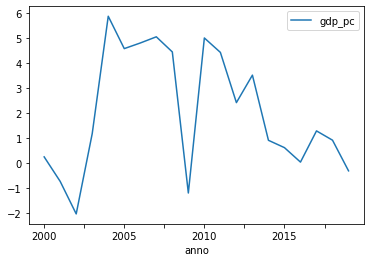

In [38]:
melt_df.groupby('anno').apply(lambda x : x.mean().drop(columns = 'anno')).drop(columns = 'anno').plot()